In [25]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import json

In [5]:
DATA_PATH = "data.json"

In [6]:
def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [103]:
X, y = load_data(DATA_PATH)

# create train/test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.2)

Data succesfully loaded!


In [104]:
model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=(X.shape[1], X.shape[2])))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_34 (Flatten)        (None, 1690)              0         
                                                                 
 dense_69 (Dense)            (None, 512)               865792    
                                                                 
 dropout_16 (Dropout)        (None, 512)               0         
                                                                 
 dense_70 (Dense)            (None, 256)               131328    
                                                                 
 dropout_17 (Dropout)        (None, 256)               0         
                                                                 
 dense_71 (Dense)            (None, 64)                16448     
                                                                 
 dropout_18 (Dropout)        (None, 64)              

In [105]:
model.compile(tf.keras.optimizers.Adam(0.0003), loss='sparse_categorical_crossentropy', metrics='accuracy')

In [106]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 5ms/step - loss: 12.1790 - accuracy: 0.1807 - val_loss: 2.1985 - val_accuracy: 0.1799
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 2.5946 - accuracy: 0.1784 - val_loss: 2.1775 - val_accuracy: 0.1724
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 2.3347 - accuracy: 0.2046 - val_loss: 2.1546 - val_accuracy: 0.1995
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 2.2011 - accuracy: 0.2356 - val_loss: 2.0047 - val_accuracy: 0.2871
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 2.1457 - accuracy: 0.2505 - val_loss: 1.9062 - val_accuracy: 0.3260
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 2.0691 - accuracy: 0.2654 - val_loss: 1.9169 - val_accuracy: 0.3139
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 2.0068 - accuracy: 0.2760 - val_loss: 1.8348 - val_accuracy: 0.333

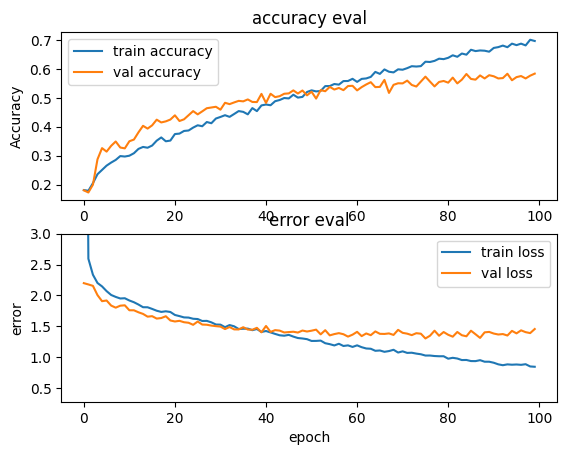

In [109]:
fig, axs = plt.subplots(2)

#accuracy
axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="val accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="best")
axs[0].set_title("accuracy eval")

#error
axs[1].plot(history.history["loss"], label="train loss")
axs[1].plot(history.history["val_loss"], label="val loss")
axs[1].set_ylabel("loss")
axs[1].set_ylim(top=3)
axs[1].set_xlabel("epoch")
axs[1].legend(loc="best")
axs[1].set_title("error eval")

plt.show()

In [110]:
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)


# predictions = model.predict(X_test[:3])
# print("predictions shape:", predictions.shape)
# print(tf.math.argmax(predictions[0]))

5/5 [==============================] - 0s 17ms/step - loss: 1.5611 - accuracy: 0.5650
test loss, test acc: [1.561076045036316, 0.5649999976158142]


In [111]:
model = tf.keras.Sequential()

# 1st conv layer
model.add(layers.Conv2D(32, 5, padding='same', activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
# model.add(layers.MaxPool2D(3, 2, padding='same'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(32, 5, padding='valid', activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(32, 3, padding='valid', activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(32, 3, padding='valid', activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(32, 3, padding='valid', activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(32, 3, padding='valid', activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(32, 1, padding='valid', activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(128, 'relu'))
model.add(layers.Dense(10, 'softmax'))
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_100 (Conv2D)         (None, 130, 13, 32)       832       
                                                                 
 batch_normalization_98 (Bat  (None, 130, 13, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_101 (Conv2D)         (None, 126, 9, 32)        25632     
                                                                 
 batch_normalization_99 (Bat  (None, 126, 9, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_102 (Conv2D)         (None, 124, 7, 32)        9248      
                                                                 
 batch_normalization_100 (Ba  (None, 124, 7, 32)     

In [112]:
model.compile(tf.keras.optimizers.Adam(0.0003), loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=10)

Epoch 1/10
219/219 [==============================] - 3s 12ms/step - loss: 1.7118 - accuracy: 0.4266 - val_loss: 1.5028 - val_accuracy: 0.4674
Epoch 2/10
219/219 [==============================] - 2s 11ms/step - loss: 1.1348 - accuracy: 0.6029 - val_loss: 1.2583 - val_accuracy: 0.5818
Epoch 3/10
219/219 [==============================] - 2s 11ms/step - loss: 0.8386 - accuracy: 0.6993 - val_loss: 1.1481 - val_accuracy: 0.5993
Epoch 4/10
219/219 [==============================] - 2s 11ms/step - loss: 0.6036 - accuracy: 0.7897 - val_loss: 1.0055 - val_accuracy: 0.6498
Epoch 5/10
219/219 [==============================] - 2s 10ms/step - loss: 0.4153 - accuracy: 0.8639 - val_loss: 1.1281 - val_accuracy: 0.6398
Epoch 6/10
219/219 [==============================] - 2s 10ms/step - loss: 0.2893 - accuracy: 0.9110 - val_loss: 1.0975 - val_accuracy: 0.6411
Epoch 7/10
219/219 [==============================] - 2s 10ms/step - loss: 0.2227 - accuracy: 0.9372 - val_loss: 1.1339 - val_accuracy: 0.6469

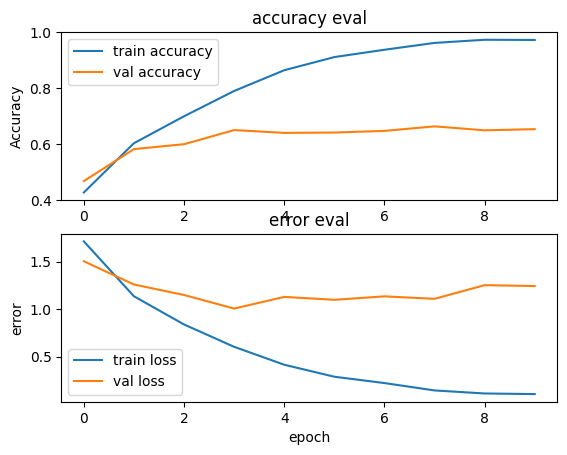

In [113]:
fig, axs = plt.subplots(2)

#accuracy
axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="val accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="best")
axs[0].set_title("accuracy eval")

#error
axs[1].plot(history.history["loss"], label="train loss")
axs[1].plot(history.history["val_loss"], label="val loss")
axs[1].set_ylabel("error")
axs[1].set_xlabel("epoch")
axs[1].legend(loc="best")
axs[1].set_title("error eval")

plt.show()

In [114]:
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

5/5 [==============================] - 1s 86ms/step - loss: 1.3504 - accuracy: 0.6267
test loss, test acc: [1.3503608703613281, 0.6266666650772095]


In [115]:
model = tf.keras.Sequential()

model.add(layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(layers.LSTM(64))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 130, 64)           19968     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_75 (Dense)            (None, 64)                4160      
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_76 (Dense)            (None, 10)                650       
                                                                 
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.compile(tf.keras.optimizers.Adam(0.0003), loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=100)

Epoch 1/100
219/219 [==============================] - 5s 18ms/step - loss: 1.9350 - accuracy: 0.3351 - val_loss: 1.6007 - val_accuracy: 0.4391
Epoch 2/100
219/219 [==============================] - 4s 16ms/step - loss: 1.5609 - accuracy: 0.4568 - val_loss: 1.3960 - val_accuracy: 0.5113
Epoch 3/100
219/219 [==============================] - 3s 16ms/step - loss: 1.4313 - accuracy: 0.5014 - val_loss: 1.3293 - val_accuracy: 0.5338
Epoch 4/100
219/219 [==============================] - 3s 16ms/step - loss: 1.3339 - accuracy: 0.5358 - val_loss: 1.2726 - val_accuracy: 0.5417
Epoch 5/100
219/219 [==============================] - 3s 16ms/step - loss: 1.2777 - accuracy: 0.5539 - val_loss: 1.2146 - val_accuracy: 0.5718
Epoch 6/100
219/219 [==============================] - 3s 16ms/step - loss: 1.2263 - accuracy: 0.5722 - val_loss: 1.2288 - val_accuracy: 0.5672
Epoch 7/100
219/219 [==============================] - 3s 16ms/step - loss: 1.1792 - accuracy: 0.5948 - val_loss: 1.1343 - val_accuracy:

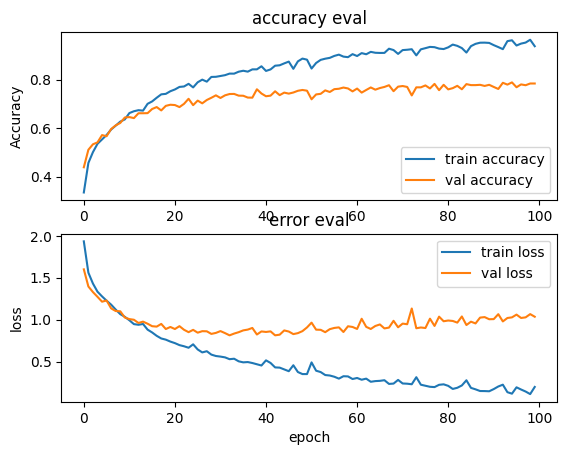

In [119]:
fig, axs = plt.subplots(2)

#accuracy
axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="val accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="best")
axs[0].set_title("accuracy eval")

#error
axs[1].plot(history.history["loss"], label="train loss")
axs[1].plot(history.history["val_loss"], label="val loss")
axs[1].set_ylabel("loss")
axs[1].set_xlabel("epoch")
axs[1].legend(loc="best")
axs[1].set_title("error eval")

plt.show()

In [120]:
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

5/5 [==============================] - 0s 50ms/step - loss: 1.1995 - accuracy: 0.7450
test loss, test acc: [1.1994649171829224, 0.7450000047683716]
